# GLMs

Topics from class utilized in this notebook: data pre-processing, error metrics.

Topic of GLMs and `statsmodels` package came from material in Data 102.

## Table of Contents

1. Data Importation & Feature Engineering
1. Apple Stock Models (with and without Intercepts)
    2.1 OLS
    2.2 Poisson
    2.3 Negative Binomial 
1. GLM's Downfall Experiment (NVIDIA Stock)
    3.1 OLS
    3.2 Poisson

## 1. Data Importation & Feature Engineering

In [ ]:
# # dependencies
!pip install statsmodels
!pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
import matplotlib.pyplot as plt
%matplotlib inline

Code below is taken from Jatin's work on getting the data using Apple and the Yahoo Finance functionality.

In [ ]:
symbol = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'
apple_stock = yf.download(symbol, start = start_date, end = end_date)

# adding in column that will be input
lst_of_close = [0] + list(apple_stock['Adj Close'][0:-1]) 
apple_stock['Previous Adj Close'] = lst_of_close

# dropping first row since previous adj close is set to 0 -- inaccurate
apple_stock = apple_stock.iloc[1:, :]

X = apple_stock[['Previous Adj Close']]
y = apple_stock['Adj Close']

# z-scores also available for testing out
X_z_score = pd.DataFrame((apple_stock['Previous Adj Close'] - np.mean(apple_stock['Previous Adj Close'])) / np.std(apple_stock['Previous Adj Close']))
y_z_score = (apple_stock['Adj Close'] - np.mean(apple_stock['Adj Close'])) / np.std(apple_stock['Adj Close'])

[*********************100%%**********************]  1 of 1 completed


Also gathering six months of data for formulating future predictions for each model, acts as a "test set".

In [ ]:
start_date_pred = '2023-01-02'
end_date_pred = '2023-06-01'
apple_stock_pred = yf.download(symbol, start = start_date_pred, end = end_date_pred)

# adding in column that will be input
lst_of_close = [0] + list(apple_stock_pred['Adj Close'][0:-1]) 
apple_stock_pred['Previous Adj Close'] = lst_of_close

apple_stock_pred = apple_stock_pred.iloc[1:, :]

X_pred = apple_stock_pred[['Previous Adj Close']]
y_pred = apple_stock_pred['Adj Close']

X_z_score_pred = pd.DataFrame((apple_stock_pred['Previous Adj Close'] - np.mean(apple_stock_pred['Previous Adj Close'])) / np.std(apple_stock_pred['Previous Adj Close']))
y_z_score_pred = (apple_stock_pred['Adj Close'] - np.mean(apple_stock_pred['Adj Close'])) / np.std(apple_stock_pred['Adj Close'])

[*********************100%%**********************]  1 of 1 completed


Taking a look at the overall data.

In [ ]:
apple_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Previous Adj Close
Date,,,,,,,
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669983,99310400,179.953888
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.944000,94537600,177.669983
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000,172.944000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225052,86709100,170.056976
2022-01-10,169.080002,172.500000,168.169998,172.190002,170.244827,106765600,170.225052


## 2. Apple Stock Models (with and without Intercepts)

### 2.1 OLS Model

Two different models -- one with a constant added and one without -- fitted on `X` and `y` as defined above.

#### OLS Model without Intercept

In [ ]:
ols = sm.OLS(y, X).fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:              Adj Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.185e+05
Date:                Tue, 05 Dec 2023   Prob (F-statistic):                        0.00
Time:                        18:30:46   Log-Likelihood:                         -658.67
No. Observations:                 250   AIC:                                      1319.
Df Residuals:                     249   BIC:                                      1323.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [ ]:
mse(y, ols.predict(X))

11.37561641568282

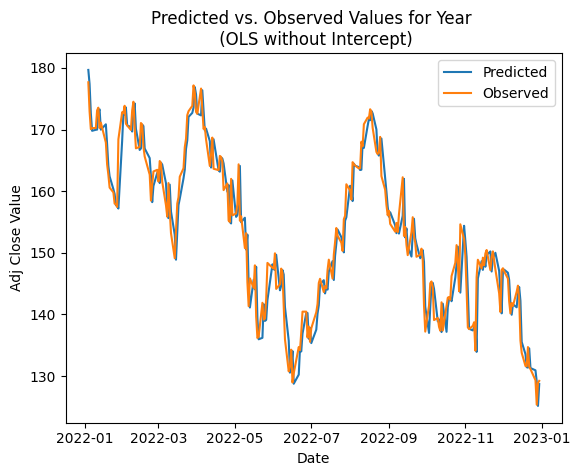

In [ ]:
ols_pred_og_vals = ols.predict(X)
plt.plot(apple_stock.index, ols_pred_og_vals, label = 'Predicted');
plt.plot(apple_stock.index, y, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for Year \n (OLS without Intercept)');
plt.legend();
plt.show()

In [ ]:
mse(y_pred, ols.predict(X_pred))

4.873919971244811

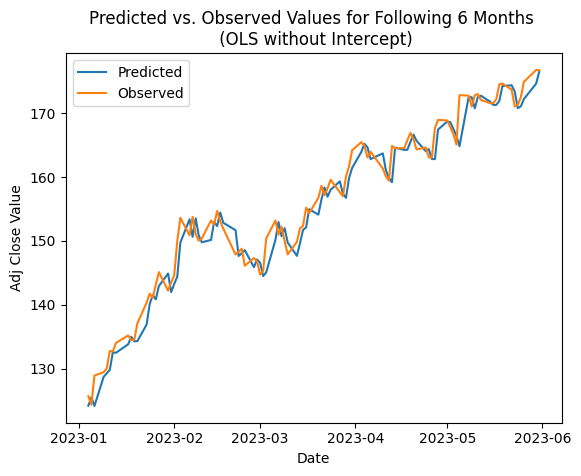

In [ ]:
ols_pred_vals = ols.predict(X_pred)
plt.plot(apple_stock_pred.index, ols_pred_vals, label = 'Predicted');
plt.plot(apple_stock_pred.index, y_pred, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for Following 6 Months \n (OLS without Intercept)');
plt.legend();
plt.show()

#### OLS Model with Intercept

In [ ]:
X_w_intercept = sm.add_constant(X)
X_zs_w_intercept = sm.add_constant(X_z_score)
X_pred_w_intercept = sm.add_constant(X_pred)
X_zs_pred_w_intercept = sm.add_constant(X_z_score_pred)


ols_w_intercept = sm.OLS(y, X_w_intercept).fit()
print(ols_w_intercept.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     3311.
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          1.84e-145
Time:                        18:31:22   Log-Likelihood:                -656.44
No. Observations:                 250   AIC:                             1317.
Df Residuals:                     248   BIC:                             1324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.4445      2

In [ ]:
mse(y, ols_w_intercept.predict(X_w_intercept))

11.175000180333036

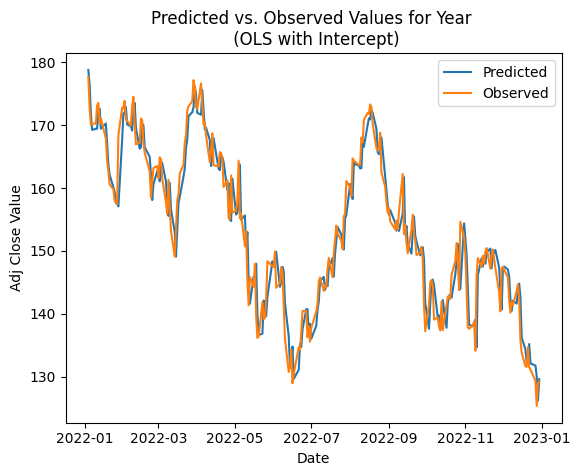

In [ ]:
olswi_pred_og_vals = ols_w_intercept.predict(X_w_intercept)
plt.plot(apple_stock.index, olswi_pred_og_vals, label = 'Predicted');
plt.plot(apple_stock.index, y, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for Year \n (OLS with Intercept)');
plt.legend();
plt.show()

In [ ]:
mse(y_pred, ols_w_intercept.predict(X_pred_w_intercept))

4.811457249307838

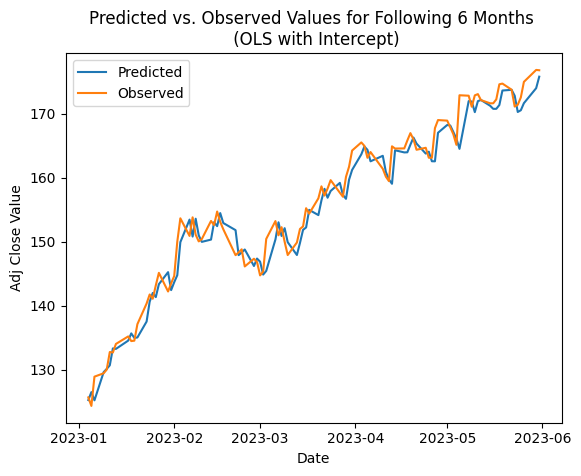

In [ ]:
olswi_pred_vals = ols_w_intercept.predict(X_pred_w_intercept)
plt.plot(apple_stock_pred.index, olswi_pred_vals, label = 'Predicted');
plt.plot(apple_stock_pred.index, y_pred, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for Following 6 Months \n (OLS with Intercept)');
plt.legend();
plt.show()

### 2.2 Poisson Model

#### Poisson Model without Intercept

In [ ]:
poisson = sm.GLM(y, X, family = sm.families.Poisson()).fit()
print(poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Adj Close   No. Observations:                  250
Model:                            GLM   Df Residuals:                      249
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2894.8
Date:                Tue, 05 Dec 2023   Deviance:                       4072.5
Time:                        18:32:41   Pearson chi2:                 4.43e+03
No. Iterations:                     5   Pseudo R-squ. (CS):         -4.165e+06
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Previous Adj Close     0.0321   3.25

In [ ]:
mse(y, poisson.predict(X))

2382.697381726662

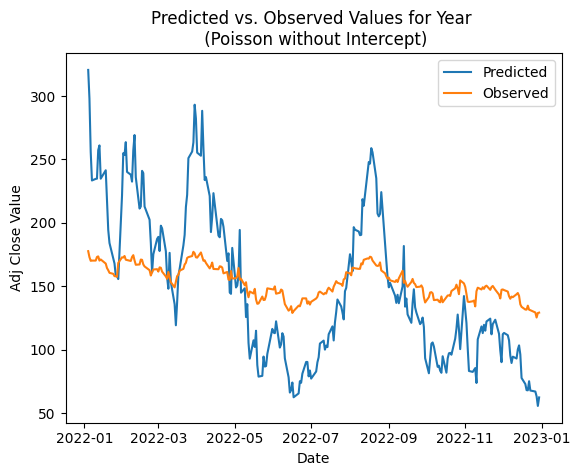

In [ ]:
p_pred_og_vals = poisson.predict(X)
plt.plot(apple_stock.index, p_pred_og_vals, label = 'Predicted');
plt.plot(apple_stock.index, y, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for Year \n (Poisson without Intercept)');
plt.legend();
plt.show()

In [ ]:
mse(y_pred, poisson.predict(X_pred))

2406.886575658351

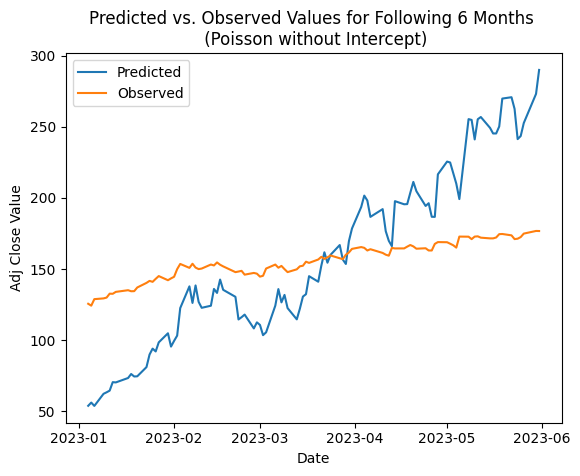

In [ ]:
p_pred_vals = poisson.predict(X_pred)
plt.plot(apple_stock_pred.index, p_pred_vals, label = 'Predicted');
plt.plot(apple_stock_pred.index, y_pred, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for Following 6 Months \n (Poisson without Intercept)');
plt.legend();
plt.show()

#### Poisson Model with Intercept

In [ ]:
poisson_w_intercept = sm.GLM(y, X_w_intercept, family = sm.families.Poisson()).fit()
print(poisson_w_intercept.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Adj Close   No. Observations:                  250
Model:                            GLM   Df Residuals:                      248
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -867.98
Date:                Tue, 05 Dec 2023   Deviance:                       18.776
Time:                        18:33:06   Pearson chi2:                     18.8
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6219
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.0652      0

In [ ]:
mse(y, poisson_w_intercept.predict(X_w_intercept))

11.361585293407016

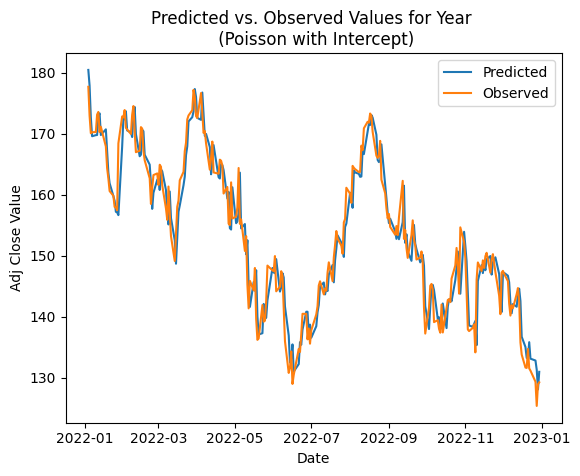

In [ ]:
pwi_pred_og_vals = poisson_w_intercept.predict(X_w_intercept)
plt.plot(apple_stock.index, pwi_pred_og_vals, label = 'Predicted');
plt.plot(apple_stock.index, y, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for Year \n (Poisson with Intercept)');
plt.legend();
plt.show()

In [ ]:
mse(y_pred, poisson_w_intercept.predict(X_pred_w_intercept))

5.0182878263629656

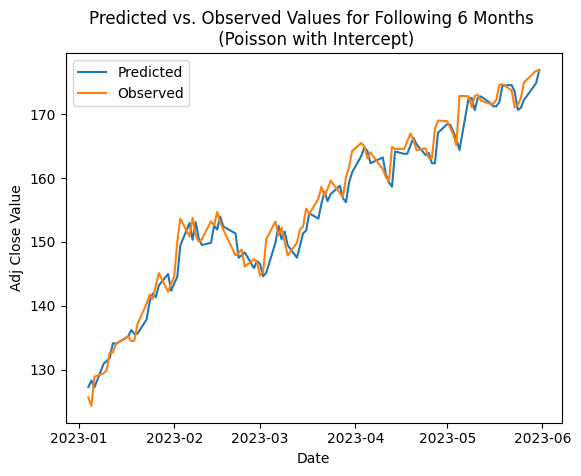

In [ ]:
pwi_pred_vals = poisson_w_intercept.predict(X_pred_w_intercept)
plt.plot(apple_stock_pred.index, pwi_pred_vals, label = 'Predicted');
plt.plot(apple_stock_pred.index, y_pred, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for Following 6 Months \n (Poisson with Intercept)');
plt.legend();
plt.show()

### 2.3 Negative Binomial Model

#### Negative Binomial Model without Intercept

In [ ]:
nb = sm.GLM(y, X, family = sm.families.NegativeBinomial()).fit()
print(nb.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Adj Close   No. Observations:                  250
Model:                            GLM   Df Residuals:                      249
Model Family:        NegativeBinomial   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1522.4
Date:                Tue, 05 Dec 2023   Deviance:                       28.230
Time:                        18:33:46   Pearson chi2:                     29.6
No. Iterations:                     4   Pseudo R-squ. (CS):            -0.1119
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Previous Adj Close     0.0329      0

In [ ]:
mse(y, nb.predict(X))

3838.116781179786

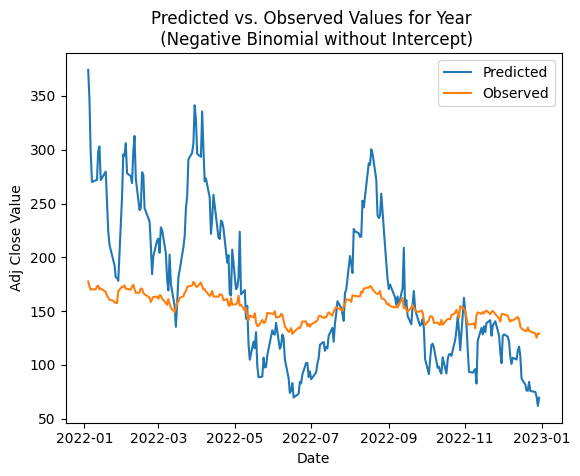

In [ ]:
nb_pred_og_vals = nb.predict(X)
plt.plot(apple_stock.index, nb_pred_og_vals, label = 'Predicted');
plt.plot(apple_stock.index, y, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for Year \n (Negative Binomial without Intercept)');
plt.legend();
plt.show()

In [ ]:
mse(y_pred, nb.predict(X_pred))

4228.4794082938015

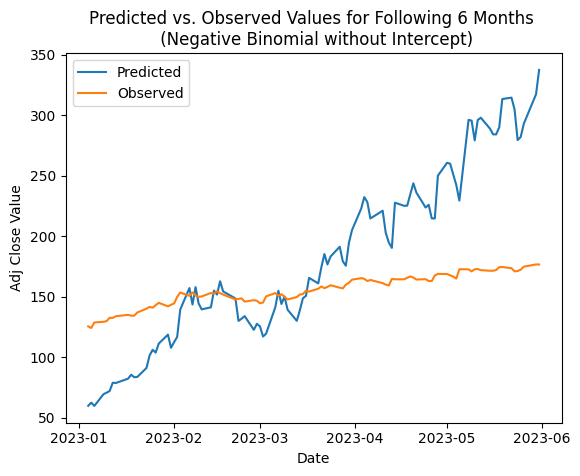

In [ ]:
nb_pred_vals = nb.predict(X_pred)
plt.plot(apple_stock_pred.index, nb_pred_vals, label = 'Predicted');
plt.plot(apple_stock_pred.index, y_pred, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for Following 6 Months \n (Negative Binomial without Intercept)');
plt.legend();
plt.show()

#### Negative Binomial Model with Intercept

In [ ]:
nb_w_intercept = sm.GLM(y, X_w_intercept, family = sm.families.NegativeBinomial()).fit()
print(nb_w_intercept.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Adj Close   No. Observations:                  250
Model:                            GLM   Df Residuals:                      248
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1508.3
Date:                Tue, 05 Dec 2023   Deviance:                      0.12398
Time:                        18:34:09   Pearson chi2:                    0.124
No. Iterations:                     3   Pseudo R-squ. (CS):           0.006299
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.0625      0

In [ ]:
mse(y, nb_w_intercept.predict(X_w_intercept))

11.364969289423039

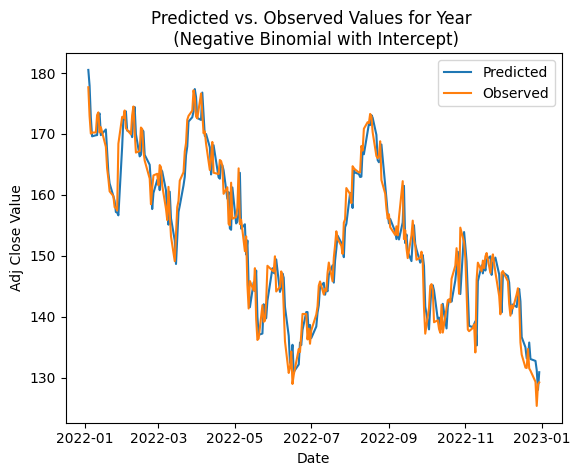

In [ ]:
nbwi_pred_og_vals = nb_w_intercept.predict(X_w_intercept)
plt.plot(apple_stock.index, nbwi_pred_og_vals, label = 'Predicted');
plt.plot(apple_stock.index, y, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for Year \n (Negative Binomial with Intercept)');
plt.legend();
plt.show()

In [ ]:
mse(y_pred, nb_w_intercept.predict(X_pred_w_intercept))

4.998127346661983

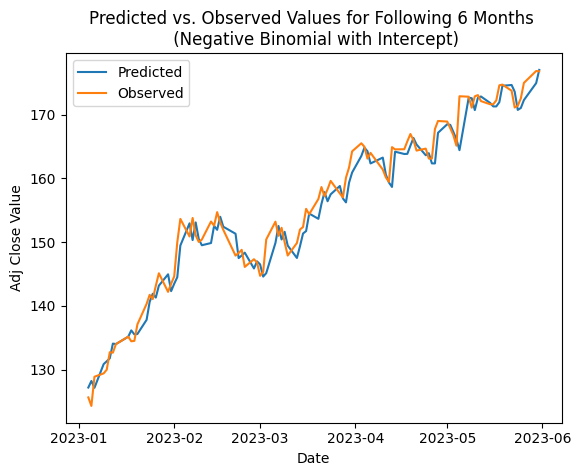

In [ ]:
nbwi_pred_vals = nb_w_intercept.predict(X_pred_w_intercept)
plt.plot(apple_stock_pred.index, nbwi_pred_vals, label = 'Predicted');
plt.plot(apple_stock_pred.index, y_pred, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for Following 6 Months \n (Negative Binomial with Intercept)');
plt.legend();
plt.show()

Keeping all of the models with the intercepts, because they performed better as compared to the ones without intercepts.

## 3. GLM's Downfall Experiment (NVIDIA Stock)

Apple Stock during the training and testing periods stayed pretty consistent over time. To show why linear regression may not be best overall choice for real-world stock prediction, using example of NVIDIA's stock.

Training model on NVIDIA's stock during year of 2022, and then testing it on May-June 2023, when stock jumped up significantly due to GPU market for AI.

In [ ]:
symbol_2 = 'NVDA'
start_date = '2022-01-01'
end_date = '2023-01-01'
nvidia_stock = yf.download(symbol_2, start = start_date, end = end_date)

# adding in column that will be input
lst_of_close = [0] + list(nvidia_stock['Adj Close'][0:-1]) 
nvidia_stock['Previous Adj Close'] = lst_of_close

# dropping first row since previous adj close is set to 0 -- inaccurate
nvidia_stock = nvidia_stock.iloc[1:, :]

X = nvidia_stock[['Previous Adj Close']]
y = nvidia_stock['Adj Close']

X_z_score = pd.DataFrame((nvidia_stock['Previous Adj Close'] - np.mean(nvidia_stock['Previous Adj Close'])) / np.std(nvidia_stock['Previous Adj Close']))
y_z_score = (nvidia_stock['Adj Close'] - np.mean(nvidia_stock['Adj Close'])) / np.std(nvidia_stock['Adj Close'])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
start_date_pred = '2023-05-01'
end_date_pred = '2023-06-01'
nvidia_stock_pred = yf.download(symbol_2, start = start_date_pred, end = end_date_pred)

lst_of_close = [0] + list(nvidia_stock_pred['Adj Close'][0:-1]) 
nvidia_stock_pred['Previous Adj Close'] = lst_of_close

nvidia_stock_pred = nvidia_stock_pred.iloc[1:, :]

X_pred = nvidia_stock_pred[['Previous Adj Close']]
y_pred = nvidia_stock_pred['Adj Close']

X_z_score_pred = pd.DataFrame((nvidia_stock_pred['Previous Adj Close'] - np.mean(nvidia_stock_pred['Previous Adj Close'])) / np.std(nvidia_stock_pred['Previous Adj Close']))
y_z_score_pred = (nvidia_stock_pred['Adj Close'] - np.mean(nvidia_stock_pred['Adj Close'])) / np.std(nvidia_stock_pred['Adj Close'])

[*********************100%%**********************]  1 of 1 completed


In [ ]:
nvidia_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Previous Adj Close
Date,,,,,,,
2022-01-04,302.769989,304.679993,283.489990,292.899994,292.522308,52715400,300.821564
2022-01-05,289.489990,294.160004,275.329987,276.040009,275.684021,49806400,292.522308
2022-01-06,276.399994,284.380005,270.649994,281.779999,281.416626,45418600,275.684021
2022-01-07,281.410004,284.220001,270.570007,272.470001,272.118652,40993900,281.416626
2022-01-10,265.809998,274.690002,256.440002,274.000000,273.646698,59468100,272.118652


In [ ]:
nvidia_stock_pred[nvidia_stock_pred.index.month == 5]

,Open,High,Low,Close,Adj Close,Volume,Previous Adj Close
Date,,,,,,,
2023-05-02,286.799988,288.359985,280.829987,282.100006,282.047607,40273000,289.046295
2023-05-03,278.399994,283.670013,274.720001,278.019989,277.968323,38338700,282.047607
2023-05-04,276.510010,278.589996,272.399994,275.619995,275.568787,32185000,277.968323
2023-05-05,278.260010,287.549988,277.309998,286.799988,286.746704,36101400,275.568787
2023-05-08,285.220001,292.200012,283.500000,291.510010,291.455841,34497900,286.746704
2023-05-09,288.989990,289.730011,284.500000,285.709991,285.656891,31486900,291.455841
2023-05-10,290.049988,291.130005,284.609985,288.850006,288.796326,36935000,285.656891
2023-05-11,288.959991,289.500000,282.459991,285.779999,285.726898,32214900,288.796326
2023-05-12,285.290009,287.799988,280.459991,283.399994,283.347321,27402700,285.726898


### 3.1 OLS Model

#### OLS Model without Intercept

In [ ]:
ols = sm.OLS(y, X).fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:              Adj Close   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.557e+05
Date:                Tue, 05 Dec 2023   Prob (F-statistic):                        0.00
Time:                        18:35:53   Log-Likelihood:                         -862.36
No. Observations:                 250   AIC:                                      1727.
Df Residuals:                     249   BIC:                                      1730.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [ ]:
mse(y, ols.predict(X))

58.03119405010825

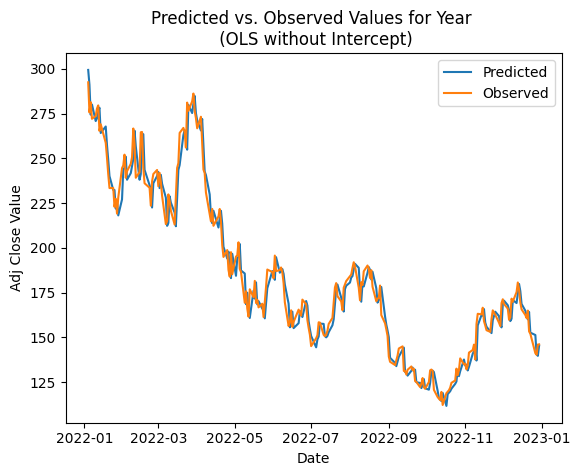

In [ ]:
ols_pred_og_vals = ols.predict(X)
plt.plot(apple_stock.index, ols_pred_og_vals, label = 'Predicted');
plt.plot(apple_stock.index, y, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for Year \n (OLS without Intercept)');
plt.legend();
plt.show()

In [ ]:
mse(y_pred, ols.predict(X_pred))

345.2303358159553

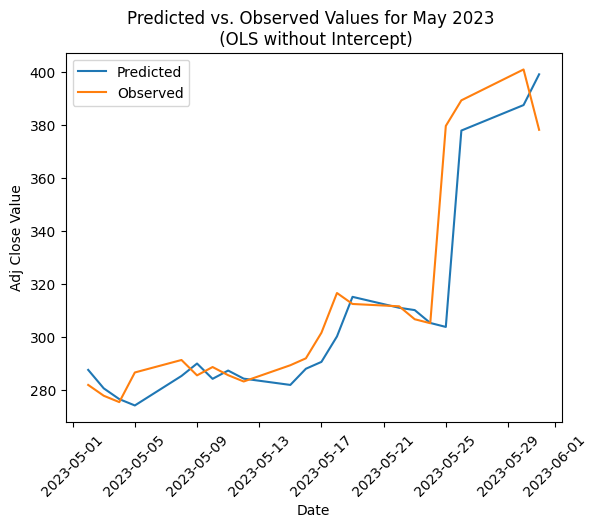

In [ ]:
ols_pred_vals = ols.predict(X_pred)
plt.xticks(rotation=45)
plt.plot(nvidia_stock_pred.index, ols_pred_vals, label = 'Predicted');
plt.plot(nvidia_stock_pred.index, y_pred, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for May 2023 \n (OLS without Intercept)');
plt.legend();
plt.show()

#### OLS Model with Intercept

In [ ]:
X_w_intercept = sm.add_constant(X)
X_zs_w_intercept = sm.add_constant(X_z_score)
X_pred_w_intercept = sm.add_constant(X_pred)
X_zs_pred_w_intercept = sm.add_constant(X_z_score_pred)


ols_w_intercept = sm.OLS(y, X_w_intercept).fit()
print(ols_w_intercept.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     8839.
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          6.02e-196
Time:                        18:36:24   Log-Likelihood:                -860.37
No. Observations:                 250   AIC:                             1725.
Df Residuals:                     248   BIC:                             1732.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.9613      1

In [ ]:
mse(y, ols_w_intercept.predict(X_w_intercept))

57.11407835448867

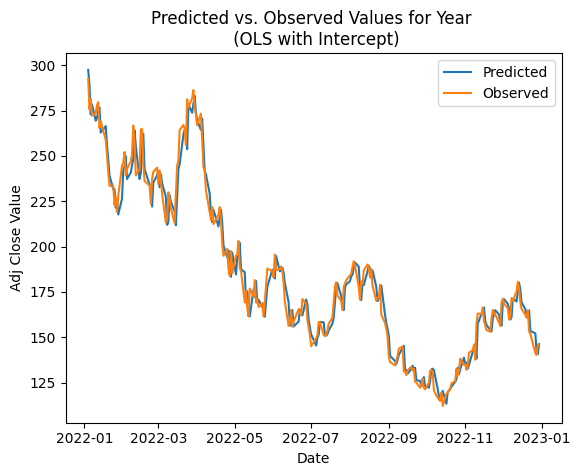

In [ ]:
olswi_pred_og_vals = ols_w_intercept.predict(X_w_intercept)
plt.plot(apple_stock.index, olswi_pred_og_vals, label = 'Predicted');
plt.plot(apple_stock.index, y, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for Year \n (OLS with Intercept)');
plt.legend();
plt.show()

In [ ]:
mse(y_pred, ols_w_intercept.predict(X_pred_w_intercept))

373.72826936455795

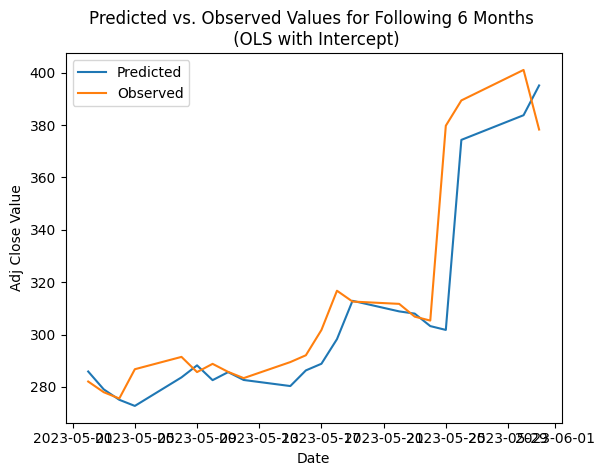

In [ ]:
olswi_pred_vals = ols_w_intercept.predict(X_pred_w_intercept)
plt.plot(nvidia_stock_pred.index, olswi_pred_vals, label = 'Predicted');
plt.plot(nvidia_stock_pred.index, y_pred, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for Following 6 Months \n (OLS with Intercept)');
plt.legend();
plt.show()

### 3.2 Poisson Model

Since Poisson outperformed Negative Binomial for Apple, testing it out here with NVIDIA.

#### Poisson Model with Intercept

In [ ]:
poisson_w_intercept = sm.GLM(y, X_w_intercept, family = sm.families.Poisson()).fit()
print(poisson_w_intercept.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Adj Close   No. Observations:                  250
Model:                            GLM   Df Residuals:                      248
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -934.32
Date:                Tue, 05 Dec 2023   Deviance:                       111.17
Time:                        18:37:25   Pearson chi2:                     111.
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.2684      0

In [ ]:
mse(y, poisson_w_intercept.predict(X_w_intercept))

87.27626219079046

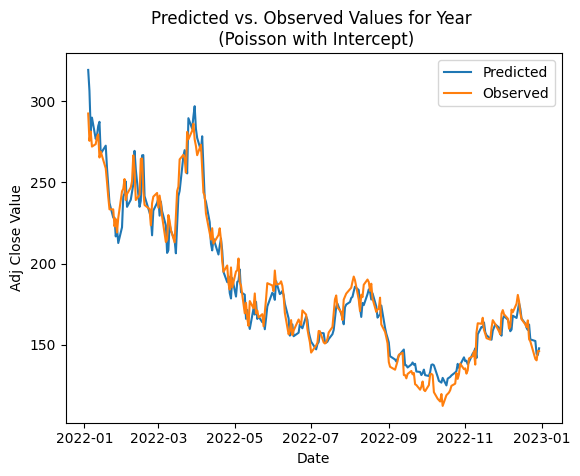

In [ ]:
pwi_pred_og_vals = poisson_w_intercept.predict(X_w_intercept)
plt.plot(nvidia_stock.index, pwi_pred_og_vals, label = 'Predicted');
plt.plot(nvidia_stock.index, y, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for Year \n (Poisson with Intercept)');
plt.legend();
plt.show()

In [ ]:
mse(y_pred, poisson_w_intercept.predict(X_pred_w_intercept))

2179.2526351596257

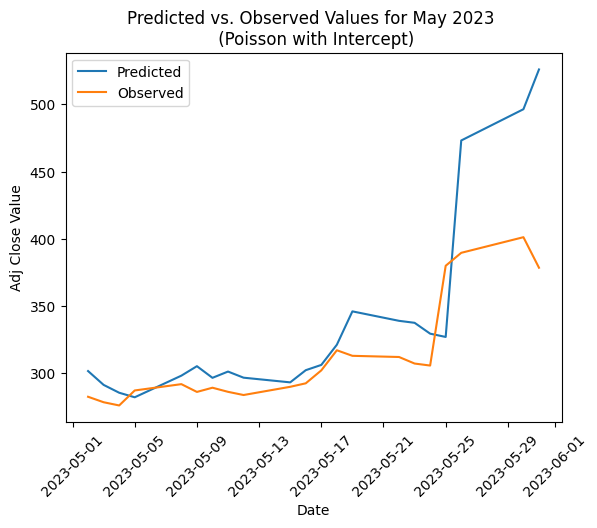

In [ ]:
pwi_pred_vals = poisson_w_intercept.predict(X_pred_w_intercept)
plt.xticks(rotation=45)
plt.plot(nvidia_stock_pred.index, pwi_pred_vals, label = 'Predicted');
plt.plot(nvidia_stock_pred.index, y_pred, label = 'Observed');
plt.xlabel('Date');
plt.ylabel('Adj Close Value');
plt.title('Predicted vs. Observed Values for May 2023 \n (Poisson with Intercept)');
plt.legend();
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f86dace4-c215-40df-9ea2-a63cc39cfa4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>